In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\\Users\\HP\\Desktop\\RKM\\SEM1\\PDS\\PDs_Project01')

In [3]:
from pandas import Series, DataFrame

In [4]:
project_df = pd.read_csv('Interest in Financial Investments.csv')
project_df1 = project_df.drop(['Timestamp'], axis =1)
project_df1 = pd.DataFrame(project_df1)
project_df1.columns = ["Name","sex", "agegroup", 
                           "int_inv", "int_exinv", "pref_inv", 
                           "pref_linv", "per_linv", "pref_minv", "per_minv", 
                           "pref_hinv", "per_hinv", "goal_pref", "sip", "fin_lite", 
                           "gamb", "per_inv"]
project_df1

Text(0.5, 1.0, 'Risk preference in different age groups')

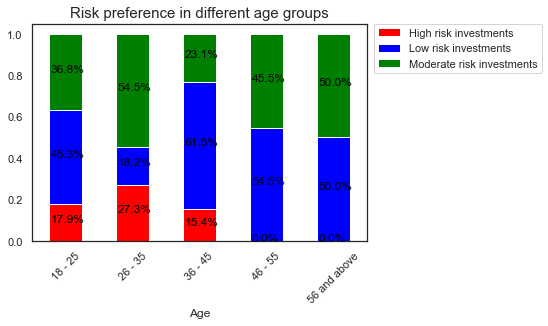

In [5]:
##Plot1

dfA0 = project_df1['pref_inv'].str.split(';', expand =True)
dfA0.columns=['pref_1', 'pref_2', 'pref_3']
age = project_df1['agegroup']
dfA1 = dfA0['pref_1']
dfA1 = pd.DataFrame(dfA1)
dfA1['agegroup']=age
dfA2 = dfA0['pref_2']
dfA2 = pd.DataFrame(dfA2)
dfA2['agegroup']=age
dfA3 = dfA0['pref_3']
dfA3 = pd.DataFrame(dfA3)
dfA3['agegroup']=age
dfA2 = dfA2.dropna()
dfA3 = dfA3.dropna()
dfA1.columns=['Preference','Age']
dfA2.columns=['Preference','Age']
dfA3.columns=['Preference','Age']
dfA=dfA1.append(dfA2)
dfA=dfA.append(dfA3)
dfA_freq=pd.crosstab(dfA.Age,dfA.Preference)
dfA_freq=dfA_freq.reset_index()
totalA = dfA_freq.sum(axis=1)

for i in ['High risk investments','Low risk investments','Moderate risk investments']:
    dfA_freq[i]=dfA_freq[i]/totalA
dfA_freq = dfA_freq.set_index('Age')    
sns.set(style='white')
dfA_freq.plot(kind='bar', stacked=True, color=['red', 'blue','green'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 45)

for n, x in enumerate([*dfA_freq.index.values]):
    
    for (proportion, y_loc) in zip(dfA_freq.loc[x],
    dfA_freq.loc[x].cumsum()):
        
        plt.text(x=n-0.22 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.title('Risk preference in different age groups', fontsize = 15)                
  


Text(0.5, 1.0, 'Risk combination preference in different age groups')

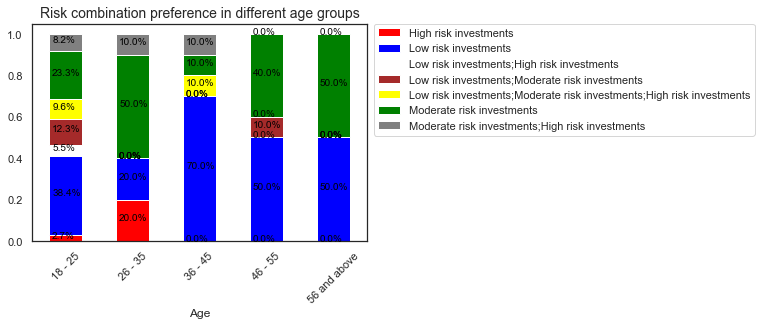

In [6]:
##Plot2

dfB_freq=pd.crosstab(project_df1.agegroup, project_df1.pref_inv)
dfB_freq=dfB_freq.reset_index()
dfB_freq =dfB_freq.rename(columns={'agegroup': 'Age'})
totalB = dfB_freq.sum(axis=1);totalB

for i in ['High risk investments',
          'Low risk investments',
          'Low risk investments;High risk investments',
          'Low risk investments;Moderate risk investments',
          'Low risk investments;Moderate risk investments;High risk investments',
          'Moderate risk investments',
          'Moderate risk investments;High risk investments']:
    dfB_freq[i]=dfB_freq[i]/totalB

sns.set(style='white')
dfB_freq.set_index('Age').plot(kind='bar', stacked=True, color = ['red', 'blue', 'white', 
                                                                       'brown', 'yellow', 'green', 'grey'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 45)

for n, x in enumerate([*dfB_freq.set_index('Age').index.values]):
    
    for (proportion, y_loc) in zip(dfB_freq.set_index('Age').loc[x],
    dfB_freq.set_index('Age').loc[x].cumsum()):
        
        plt.text(x=n-0.20 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10)
plt.title('Risk combination preference in different age groups', fontsize = 14)                
  

Text(-4.5, 0, '-56 and above-\n-46-55-\n-36-45-\n-26-35-\n-18-25-')

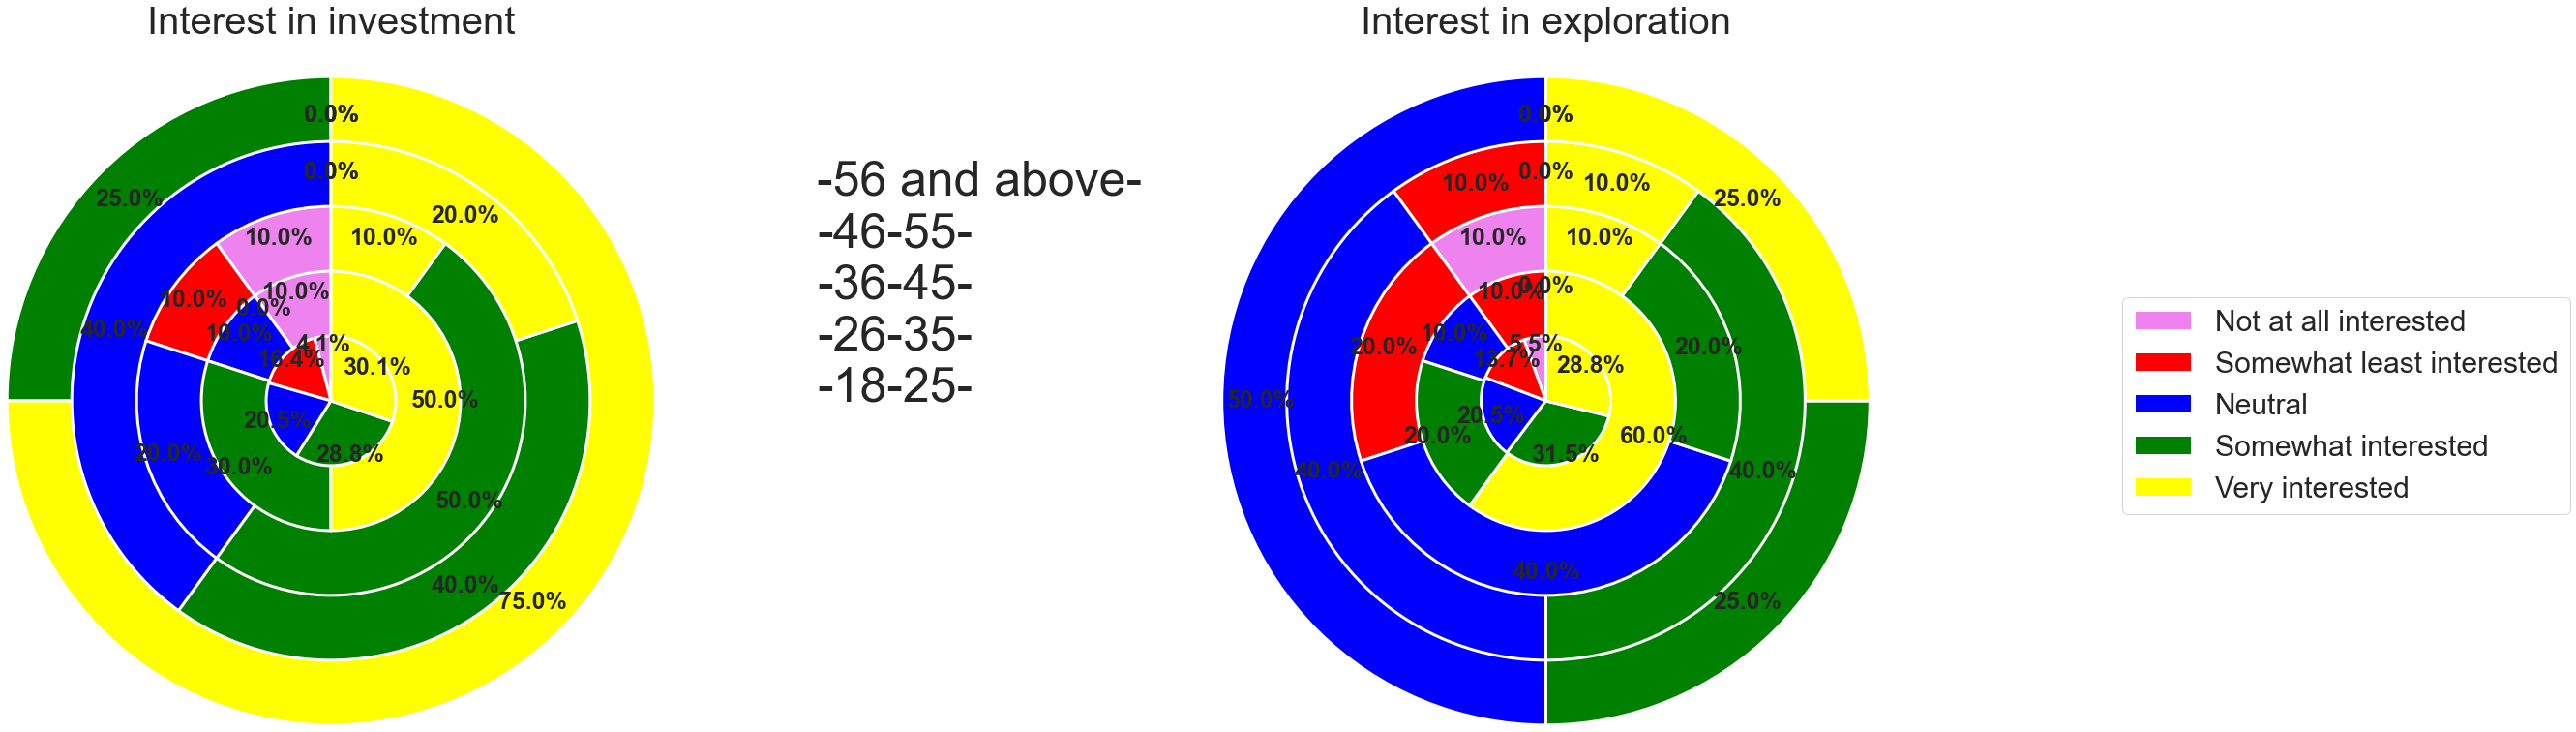

In [7]:
##Plot3

df_pie1 = pd.crosstab(project_df1.agegroup, project_df1.int_inv)
df_pie2 = pd.crosstab(project_df1.agegroup, project_df1.int_exinv)

fig, axs = plt.subplots(1, 2, figsize=(30,30))
for i in [0,1,2,3,4]:
        axs[0].pie(df_pie1.reset_index().iloc[4-i,1:6],
       startangle=90, pctdistance =0.88 , colors=['violet','red','blue','green','yellow'],
       autopct = '%1.1f%%', radius= 2.0-i*0.4, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':25},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
        axs[1].pie(df_pie2.reset_index().iloc[4-i,1:6],
       startangle=90, pctdistance =0.88 , colors=['violet','red','blue','green','yellow'],
       autopct = '%1.1f%%', radius= 2.0-i*0.4, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':25},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
        plt.subplots_adjust(wspace=2)
axs[0].set_title('Interest in investment', fontsize = 40, pad = 170) 
axs[1].set_title('Interest in exploration', fontsize = 40, pad = 170)
plt.legend(['Not at all interested','Somewhat least interested','Neutral','Somewhat interested','Very interested'], bbox_to_anchor=(1.3,0.5), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)
plt.text(-4.5, 0, '-56 and above-\n-46-55-\n-36-45-\n-26-35-\n-18-25-', fontsize = 50)




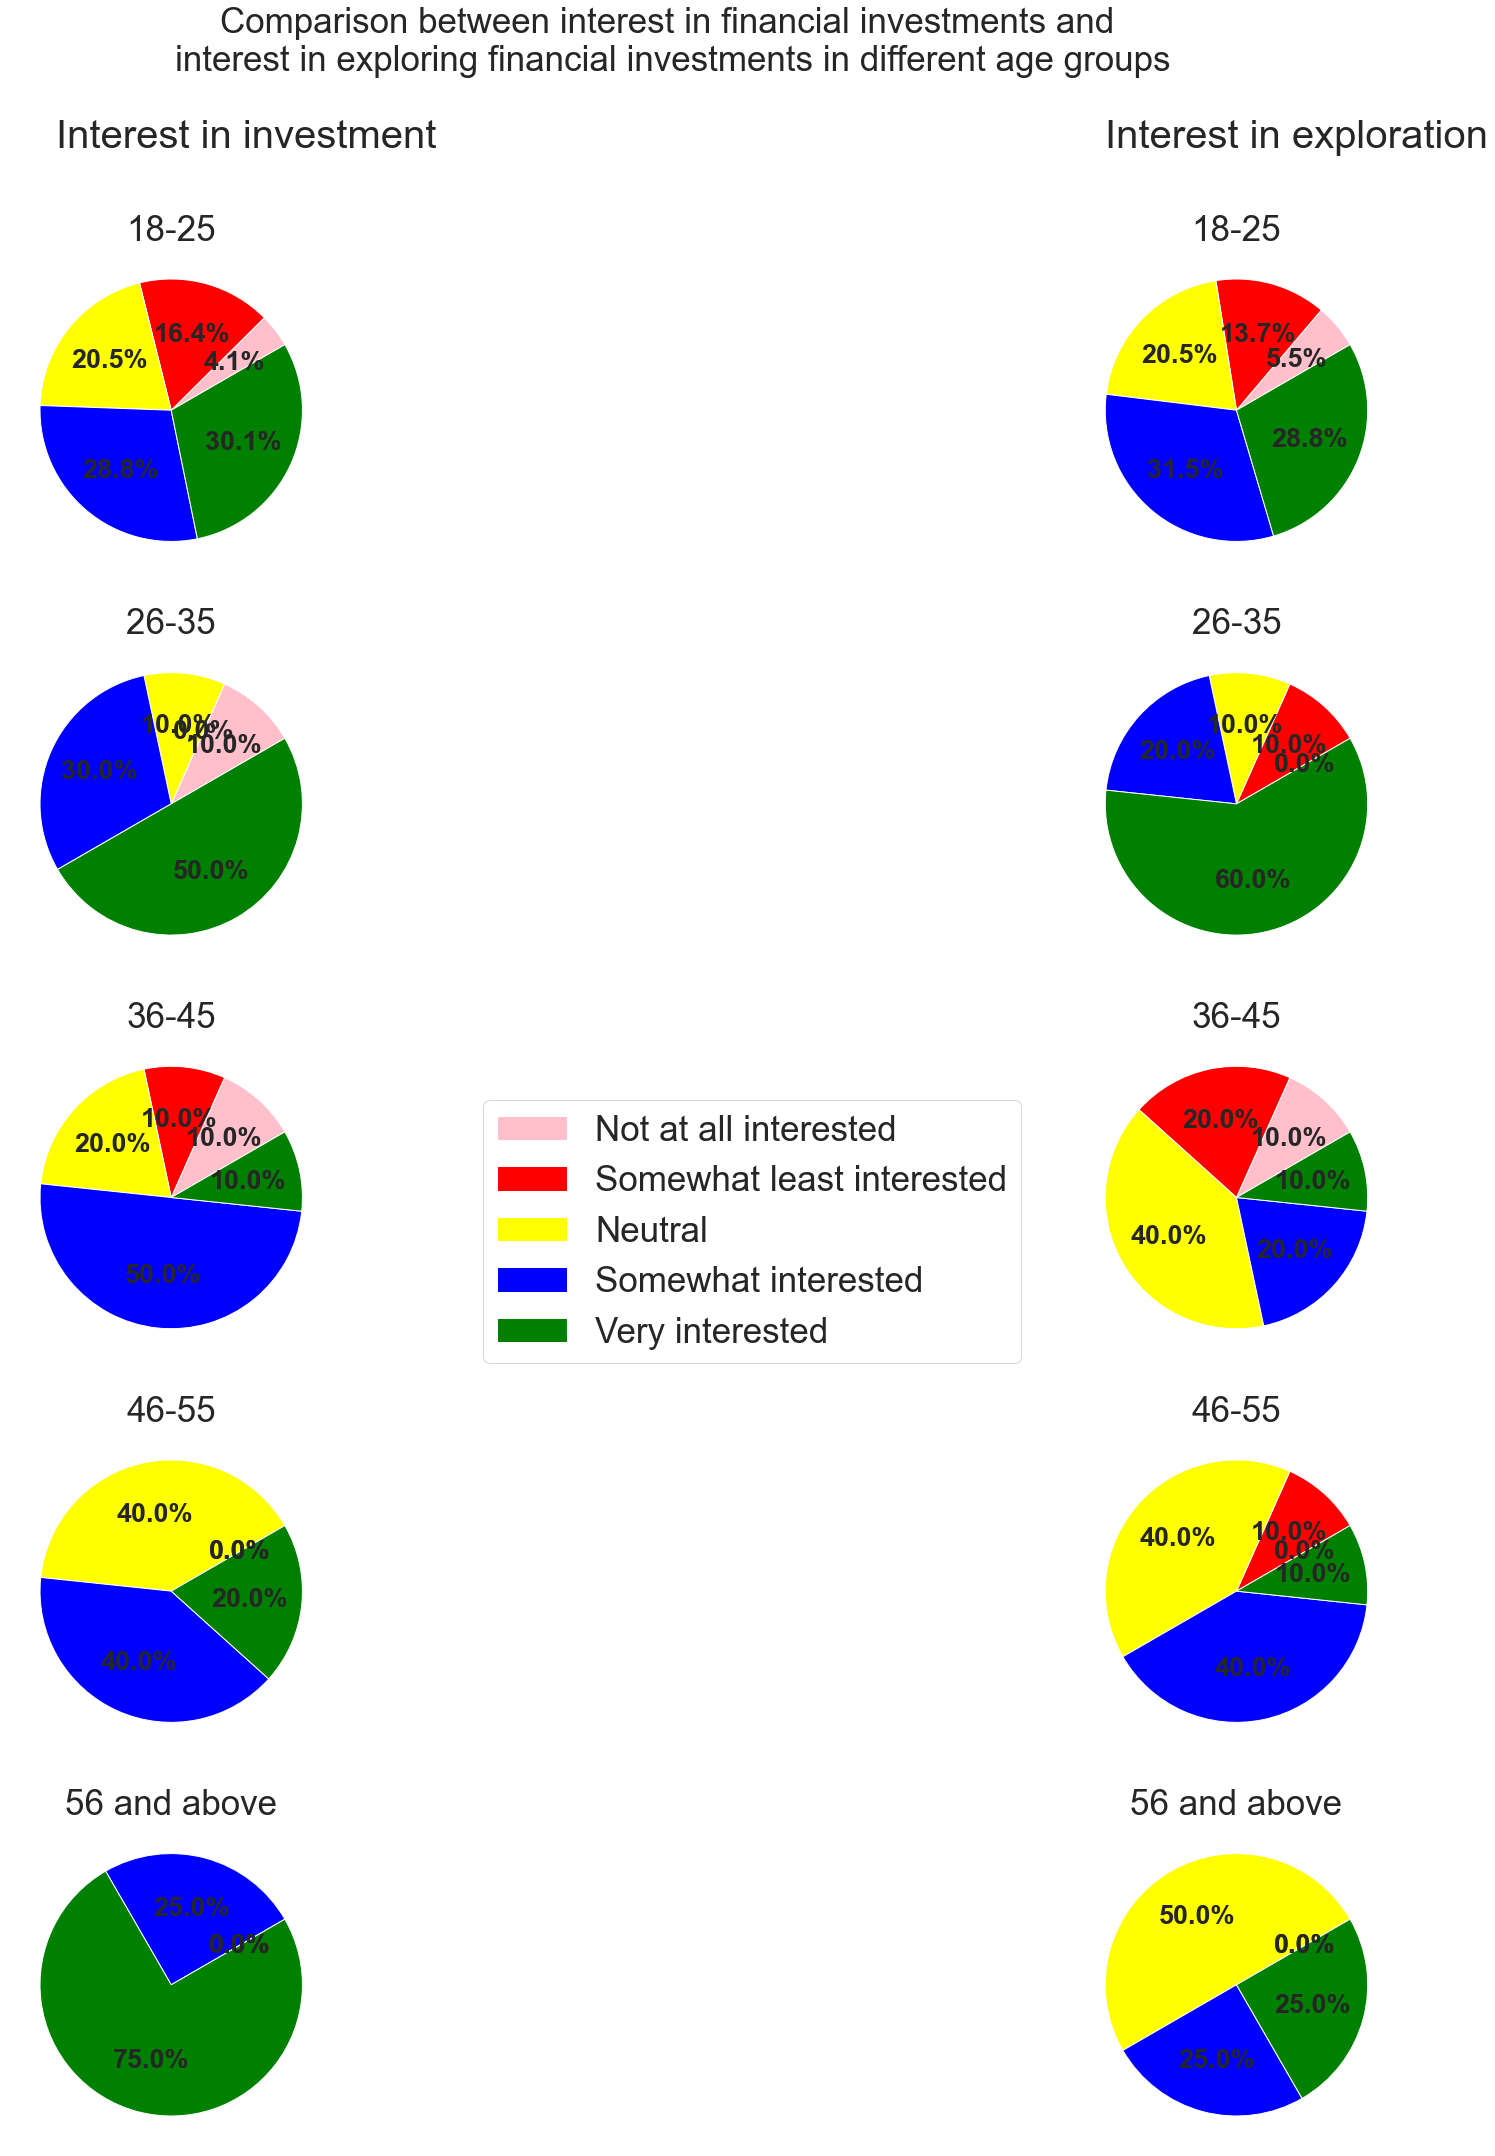

In [51]:
##Plot4 

fig, axs = plt.subplots(5, 2, figsize=(35, 35))
for i in [0,1,2,3,4]:
    axs[i,0].pie(df_pie1.reset_index().loc[i][1:6], startangle=30, autopct = '%1.1f%%', textprops={'fontweight': 'bold', 'fontsize': 27},  labeldistance=1.05, colors = ['pink', 'red', 'yellow', 'blue', 'green'])
    axs[i,1].pie(df_pie2.reset_index().loc[i][1:6], startangle=30, autopct = '%1.1f%%', textprops={'fontweight': 'bold', 'fontsize': 27},  labeldistance=1.05, colors = ['pink', 'red', 'yellow', 'blue', 'green'])
    legend = plt.legend(['Not at all interested','Somewhat least interested','Neutral','Somewhat interested','Very interested'], 
                        bbox_to_anchor=(-1.85, 3.25), # Legend position
                        loc='upper left',  
                        ncol=1, 
                        fontsize = 35,
                        fancybox=True)
for i,j in zip([0,1,2,3,4],['18-25','26-35','36-45','46-55','56 and above']):
    axs[i,0].set_title(j, fontsize=35)
    axs[i,1].set_title(j, fontsize=35)
plt.text(-9,14, 'Interest in investment', fontsize = 40)
plt.text(-1,14, 'Interest in exploration', fontsize = 40)
title = fig.suptitle('Comparison between interest in financial investments and \ninterest in exploring financial investments in different age groups', 
                     y=.975, fontsize=35)



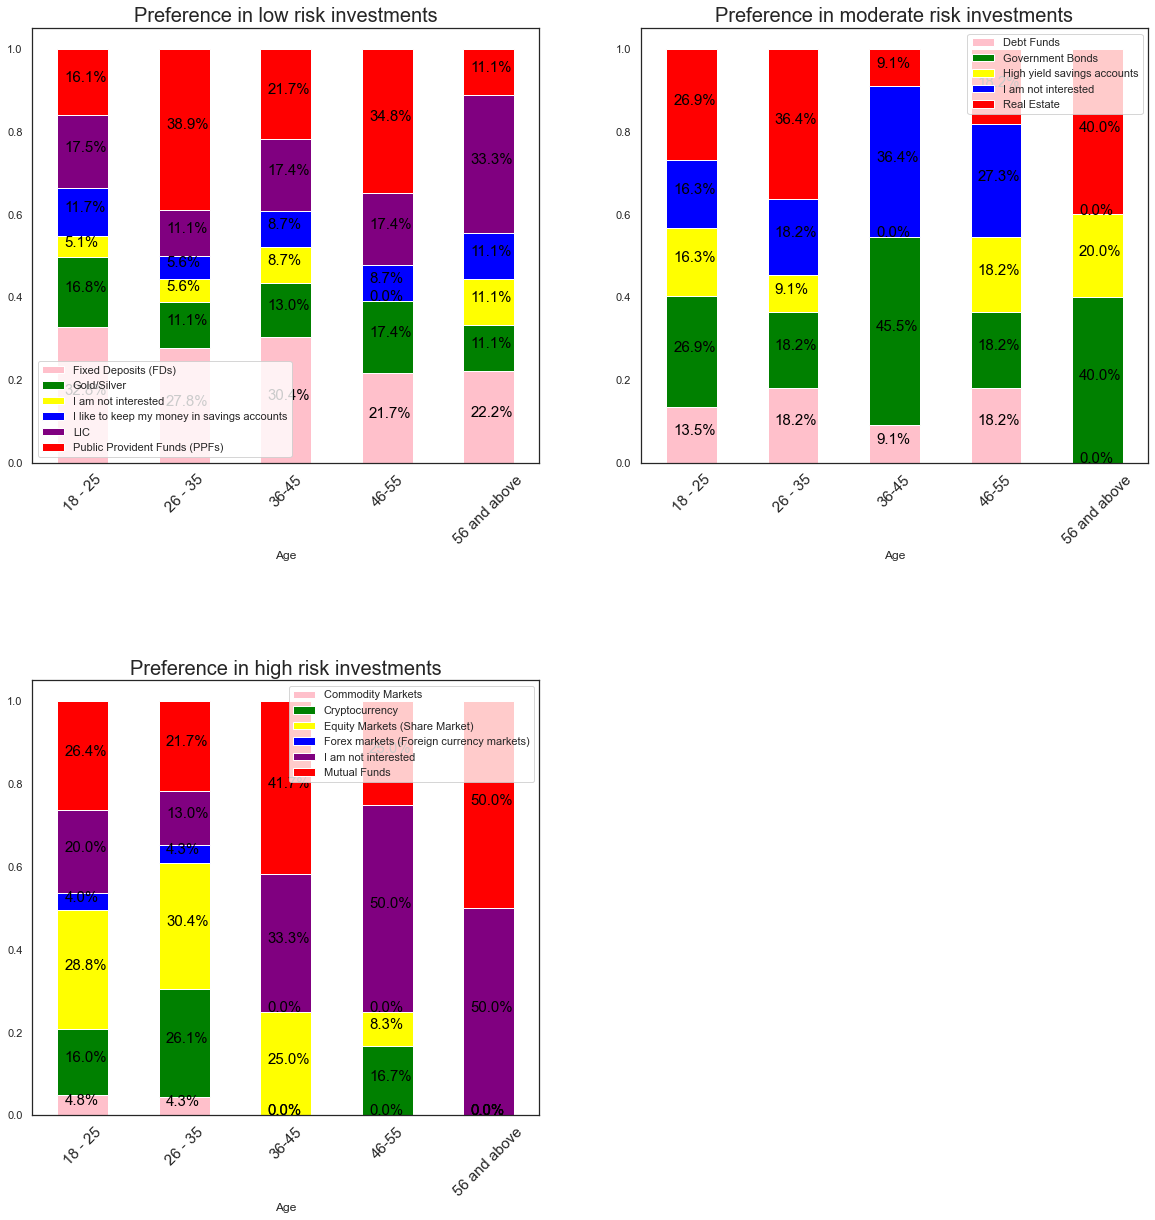

In [9]:
##Plot 5
##Low Risk Investment 

project_df2_1_0 = project_df1['pref_linv'].str.split(';', expand =True)
project_df2_1_0.columns = ['pref_1', 'pref_2', 'pref_3', 'pref_4', 'pref_5']
project_df2_1_1 = project_df2_1_0['pref_1']
project_df2_1_1 = pd.DataFrame(project_df2_1_1)
project_df2_1_1['agegroup']=age
project_df2_1_2 = project_df2_1_0['pref_2']
project_df2_1_2 = pd.DataFrame(project_df2_1_2)
project_df2_1_2['agegroup']=age
project_df2_1_3 = project_df2_1_0['pref_3']
project_df2_1_3 = pd.DataFrame(project_df2_1_3)
project_df2_1_3['agegroup']=age
project_df2_1_4 = project_df2_1_0['pref_4']
project_df2_1_4 = pd.DataFrame(project_df2_1_4)
project_df2_1_4['agegroup']=age  
project_df2_1_5 = project_df2_1_0['pref_5']
project_df2_1_5 = pd.DataFrame(project_df2_1_5)
project_df2_1_5['agegroup']=age    
project_df2_1_2 = project_df2_1_2.dropna()
project_df2_1_3 = project_df2_1_3.dropna()
project_df2_1_4 = project_df2_1_4.dropna()
project_df2_1_5 = project_df2_1_5.dropna()
project_df2_1_1.columns=['Preference','Age']
project_df2_1_2.columns=['Preference','Age']
project_df2_1_3.columns=['Preference','Age']
project_df2_1_4.columns=['Preference','Age']
project_df2_1_5.columns=['Preference','Age']
project_df2=project_df2_1_1.append(project_df2_1_2)
project_df2=project_df2.append(project_df2_1_3)
project_df2=project_df2.append(project_df2_1_4)
project_df2=project_df2.append(project_df2_1_5)
project_df2_freq=pd.crosstab(project_df2.Age,project_df2.Preference)
totalD = project_df2_freq.reset_index().sum(axis=1);totalD
project_df21_freq=project_df2_freq.reset_index()
for i in ['Fixed Deposits (FDs)','Gold/Silver','I am not interested', 
          'I like to keep my money in savings accounts','LIC','Public Provident Funds (PPFs)']:
    project_df21_freq[i]=pd.to_numeric(project_df21_freq[i])/totalD
project_df21_freq

####Moderate Risk Investment 

project_df3_1_0 = project_df1['pref_minv'].str.split(';', expand =True)
project_df3_1_0.columns = ['pref_1', 'pref_2', 'pref_3']
project_df3_1_1 = project_df3_1_0['pref_1']
project_df3_1_1 = pd.DataFrame(project_df3_1_1)
project_df3_1_1['agegroup']=age
project_df3_1_2 = project_df3_1_0['pref_2']
project_df3_1_2 = pd.DataFrame(project_df3_1_2)
project_df3_1_2['agegroup']=age
project_df3_1_3 = project_df3_1_0['pref_3']
project_df3_1_3 = pd.DataFrame(project_df3_1_3)
project_df3_1_3['agegroup']=age
project_df3_1_2 = project_df3_1_2.dropna()
project_df3_1_3 = project_df3_1_3.dropna()
project_df3_1_1.columns=['Preference','Age']
project_df3_1_2.columns=['Preference','Age']
project_df3_1_3.columns=['Preference','Age']
project_df3=project_df3_1_1.append(project_df3_1_2)
project_df3=project_df3.append(project_df3_1_3)
project_df3_freq=pd.crosstab(project_df3.Age,project_df3.Preference)
totalE = project_df3_freq.reset_index().sum(axis=1);totalE
project_df31_freq=project_df3_freq.reset_index()
for i in ['Debt Funds','Government Bonds','High yield savings accounts','I am not interested','Real Estate']:
    project_df31_freq[i]=pd.to_numeric(project_df31_freq[i])/totalE
project_df31_freq

####High Risk Investment

project_df4_1_0 = project_df1['pref_hinv'].str.split(';', expand =True)
project_df4_1_0.columns = ['pref_1', 'pref_2', 'pref_3', 'pref_4', 'pref_5']
project_df4_1_1 = project_df4_1_0['pref_1']
project_df4_1_1 = pd.DataFrame(project_df4_1_1)
project_df4_1_1['agegroup']=age
project_df4_1_2 = project_df4_1_0['pref_2']
project_df4_1_2 = pd.DataFrame(project_df4_1_2)
project_df4_1_2['agegroup']=age
project_df4_1_3 = project_df4_1_0['pref_3']
project_df4_1_3 = pd.DataFrame(project_df4_1_3)
project_df4_1_3['agegroup']=age
project_df4_1_4 = project_df4_1_0['pref_4']
project_df4_1_4 = pd.DataFrame(project_df4_1_4)
project_df4_1_4['agegroup']=age  
project_df4_1_5 = project_df4_1_0['pref_5']
project_df4_1_5 = pd.DataFrame(project_df4_1_5)
project_df4_1_5['agegroup']=age    
project_df4_1_2 = project_df4_1_2.dropna()
project_df4_1_3 = project_df4_1_3.dropna()
project_df4_1_4 = project_df4_1_4.dropna()
project_df4_1_5 = project_df4_1_5.dropna()
project_df4_1_1.columns=['Preference','Age']
project_df4_1_2.columns=['Preference','Age']
project_df4_1_3.columns=['Preference','Age']
project_df4_1_4.columns=['Preference','Age']
project_df4_1_5.columns=['Preference','Age']
project_df4=project_df4_1_1.append(project_df4_1_2)
project_df4=project_df4.append(project_df4_1_3)
project_df4=project_df4.append(project_df4_1_4)
project_df4=project_df4.append(project_df4_1_5)
project_df4_freq=pd.crosstab(project_df4.Age,project_df4.Preference)
totalF = project_df4_freq.reset_index().sum(axis=1);totalF
project_df41_freq=project_df4_freq.reset_index()
for i in ['Commodity Markets','Cryptocurrency','Equity Markets (Share Market)',
          'Forex markets (Foreign currency markets)','I am not interested','Mutual Funds']:
    project_df41_freq[i]=pd.to_numeric(project_df41_freq[i])/totalF
project_df41_freq

##Plotting

fig, axs = plt.subplots(2, 2, figsize=(20,20))
fig.delaxes(ax=axs[1,1])
project_df21_freq.set_index('Age').plot(ax=axs[0,0],kind='bar', stacked=True, 
                                        color = ['pink', 'green', 'yellow', 'blue', 'purple', 'red'])
project_df31_freq.set_index('Age').plot(ax=axs[0,1],kind='bar', stacked=True,
                                        color = ['pink', 'green', 'yellow', 'blue', 'red'])
project_df41_freq.set_index('Age').plot(ax=axs[1,0],kind='bar', stacked=True, 
                                        color = ['pink', 'green', 'yellow', 'blue', 'purple', 'red'])
axs[0, 0].set_title("Preference in low risk investments", fontsize=20)
axs[0, 1].set_title("Preference in moderate risk investments",fontsize=20)
axs[1, 0].set_title("Preference in high risk investments",fontsize=20)
axs[0, 0].set_xticklabels(['18 - 25', '26 - 35', '36-45', '46-55', '56 and above'], 
                          rotation = 45, fontsize = 15)
axs[0, 1].set_xticklabels(['18 - 25', '26 - 35', '36-45', '46-55', '56 and above'], 
                          rotation = 45, fontsize = 15)
axs[1, 0].set_xticklabels(['18 - 25', '26 - 35', '36-45', '46-55', '56 and above'], 
                          rotation = 45, fontsize = 15)
axs[0, 0].legend(loc = 'best')
axs[0, 1].legend(loc = 'best')
axs[1, 0].legend(loc = 'best')

for n, x in enumerate([*project_df21_freq.set_index('Age').index.values]):
    
    for (proportion, y_loc) in zip(project_df21_freq.set_index('Age').loc[x],
    project_df21_freq.set_index('Age').loc[x].cumsum()):
        
        axs[0,0].text(x=n-0.18 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=15)
for n, x in enumerate([*project_df31_freq.set_index('Age').index.values]):
    
    for (proportion, y_loc) in zip(project_df31_freq.set_index('Age').loc[x],
    project_df31_freq.set_index('Age').loc[x].cumsum()):
        
        axs[0,1].text(x=n-0.18 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=15)
for n, x in enumerate([*project_df41_freq.set_index('Age').index.values]):
    
    for (proportion, y_loc) in zip(project_df41_freq.set_index('Age').loc[x],
    project_df41_freq.set_index('Age').loc[x].cumsum()):
        
        axs[1,0].text(x=n-0.18 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=15)
        
plt.subplots_adjust(hspace=0.5)

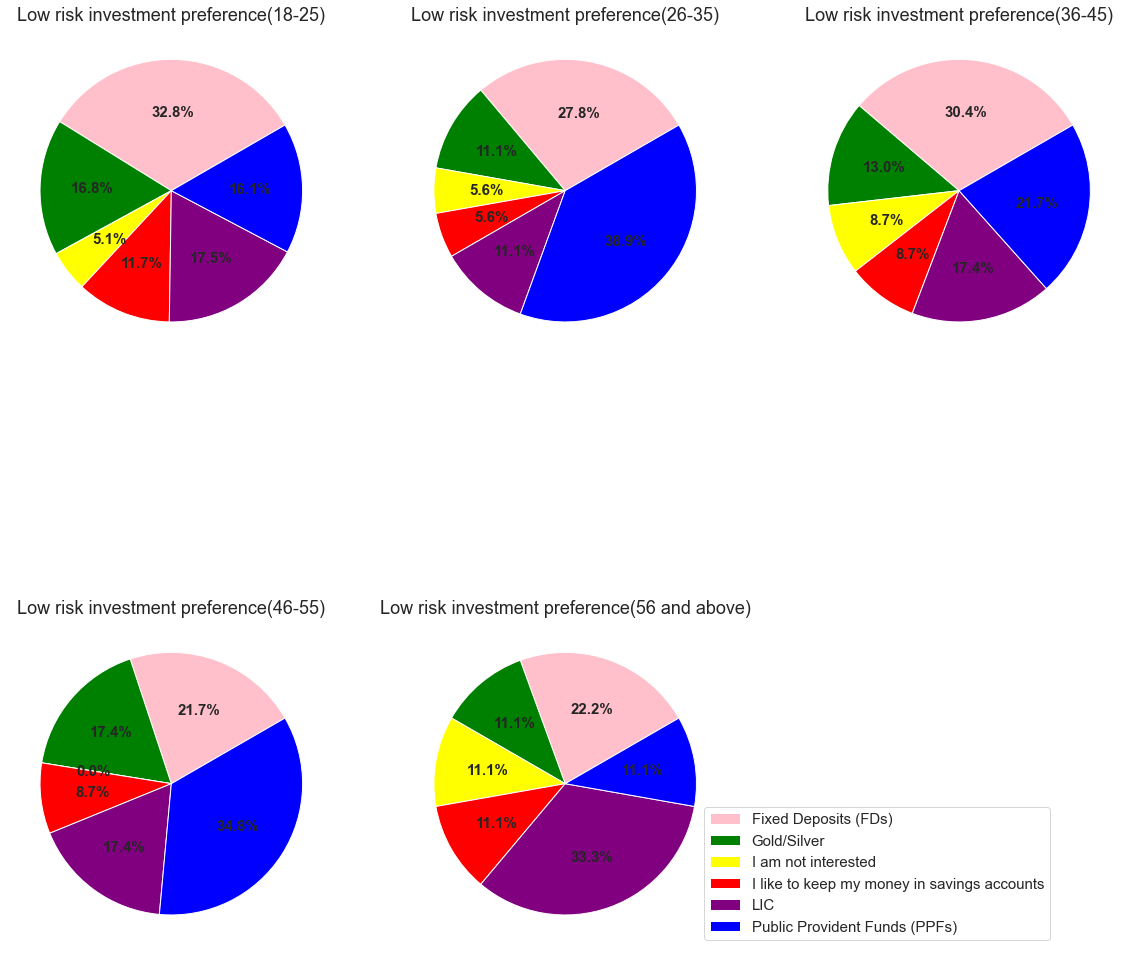

In [10]:
##Plot 6
##Low Risk Investment
pie_df_2_18_25 = pd.DataFrame(project_df2_freq.loc['18 - 25'])

pie_df_2_26_35 = pd.DataFrame(project_df2_freq.loc['26 - 35'])

pie_df_2_36_45 = pd.DataFrame(project_df2_freq.loc['36 - 45'])

pie_df_2_46_55 = pd.DataFrame(project_df2_freq.loc['46 - 55'])

pie_df_2_56 = pd.DataFrame(project_df2_freq.loc['56 and above'])

fig, axs = plt.subplots(2, 3, figsize=(20,20))
fig.delaxes(ax=axs[1,2])

axs[0,0].pie(pie_df_2_18_25['18 - 25'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[0,0].set_title("Low risk investment preference(18-25)", fontsize=18)
axs[0,1].pie(pie_df_2_26_35['26 - 35'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[0,1].set_title("Low risk investment preference(26-35)", fontsize=18)
axs[0,2].pie(pie_df_2_36_45['36 - 45'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[0,2].set_title("Low risk investment preference(36-45)", fontsize=18)
axs[1,0].pie(pie_df_2_46_55['46 - 55'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[1,0].set_title("Low risk investment preference(46-55)", fontsize=18)
axs[1,1].pie(pie_df_2_56['56 and above'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[1,1].set_title("Low risk investment preference(56 and above)", fontsize=18)

legend = plt.legend(['Fixed Deposits (FDs)','Gold/Silver','I am not interested', 
                     'I like to keep my money in savings accounts','LIC','Public Provident Funds (PPFs)'], 
                        bbox_to_anchor=(2, 0), 
                        loc='lower right',  
                        ncol=1,
                        fontsize = 15,
                        fancybox=True)


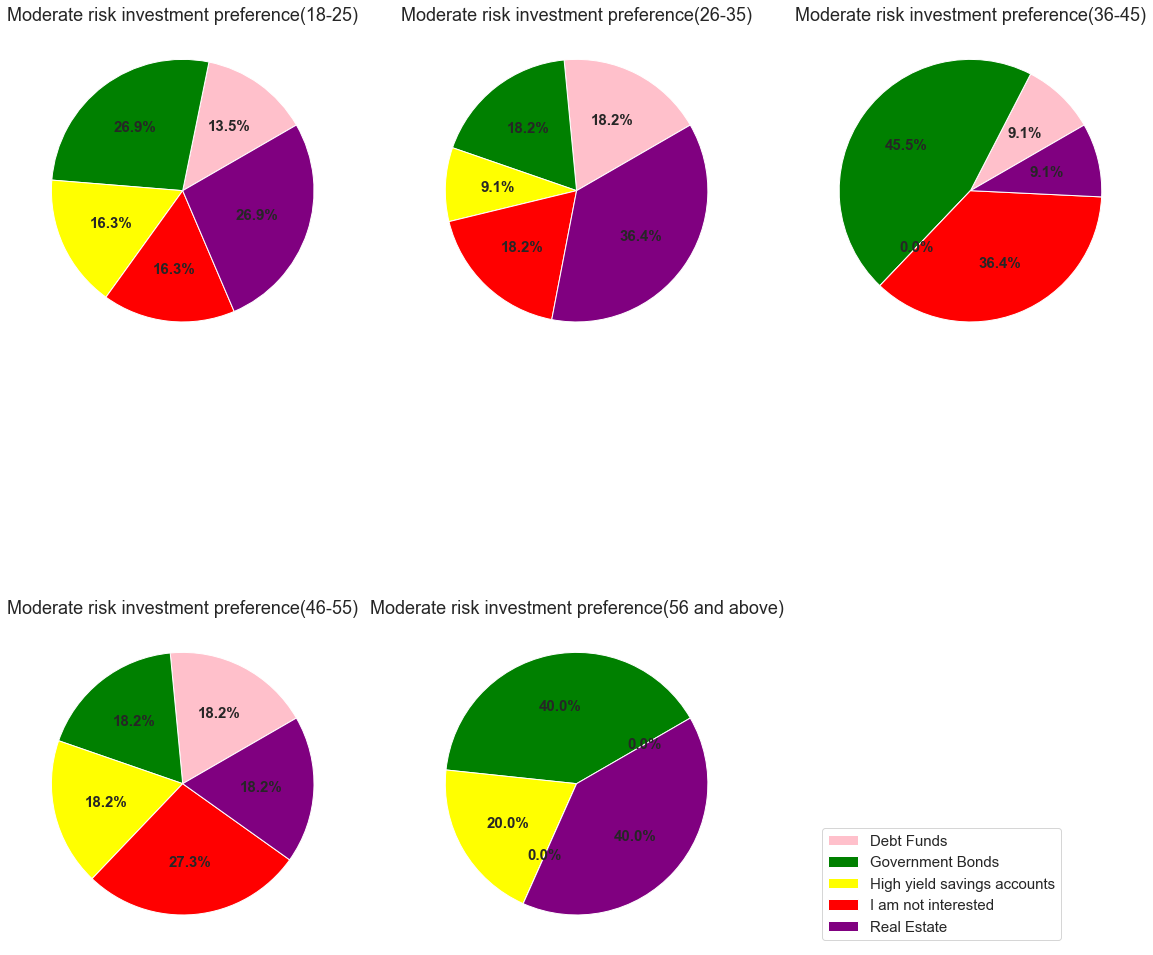

In [11]:
##Plot 7
##Moderate Risk Investment
pie_df_3_18_25 = pd.DataFrame(project_df3_freq.loc['18 - 25'])

pie_df_3_26_35 = pd.DataFrame(project_df3_freq.loc['26 - 35'])

pie_df_3_36_45 = pd.DataFrame(project_df3_freq.loc['36 - 45'])

pie_df_3_46_55 = pd.DataFrame(project_df3_freq.loc['46 - 55'])

pie_df_3_56 = pd.DataFrame(project_df3_freq.loc['56 and above'])

fig, axs = plt.subplots(2, 3, figsize=(20,20))
fig.delaxes(ax=axs[1,2])

axs[0,0].pie(pie_df_3_18_25['18 - 25'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple'])
axs[0,0].set_title("Moderate risk investment preference(18-25)", fontsize=18)
axs[0,1].pie(pie_df_3_26_35['26 - 35'], startangle=30, autopct = '%1.1f%%',
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple'])
axs[0,1].set_title("Moderate risk investment preference(26-35)", fontsize=18)
axs[0,2].pie(pie_df_3_36_45['36 - 45'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple'])
axs[0,2].set_title("Moderate risk investment preference(36-45)", fontsize=18)
axs[1,0].pie(pie_df_3_46_55['46 - 55'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple'])
axs[1,0].set_title("Moderate risk investment preference(46-55)", fontsize=18)
axs[1,1].pie(pie_df_3_56['56 and above'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple'])
axs[1,1].set_title("Moderate risk investment preference(56 and above)", fontsize=18)

legend = plt.legend(['Debt Funds','Government Bonds','High yield savings accounts',
                     'I am not interested','Real Estate'], 
                        bbox_to_anchor=(2, 0), 
                        loc='lower right',  
                        ncol=1, 
                        fontsize = 15,
                        fancybox=True)

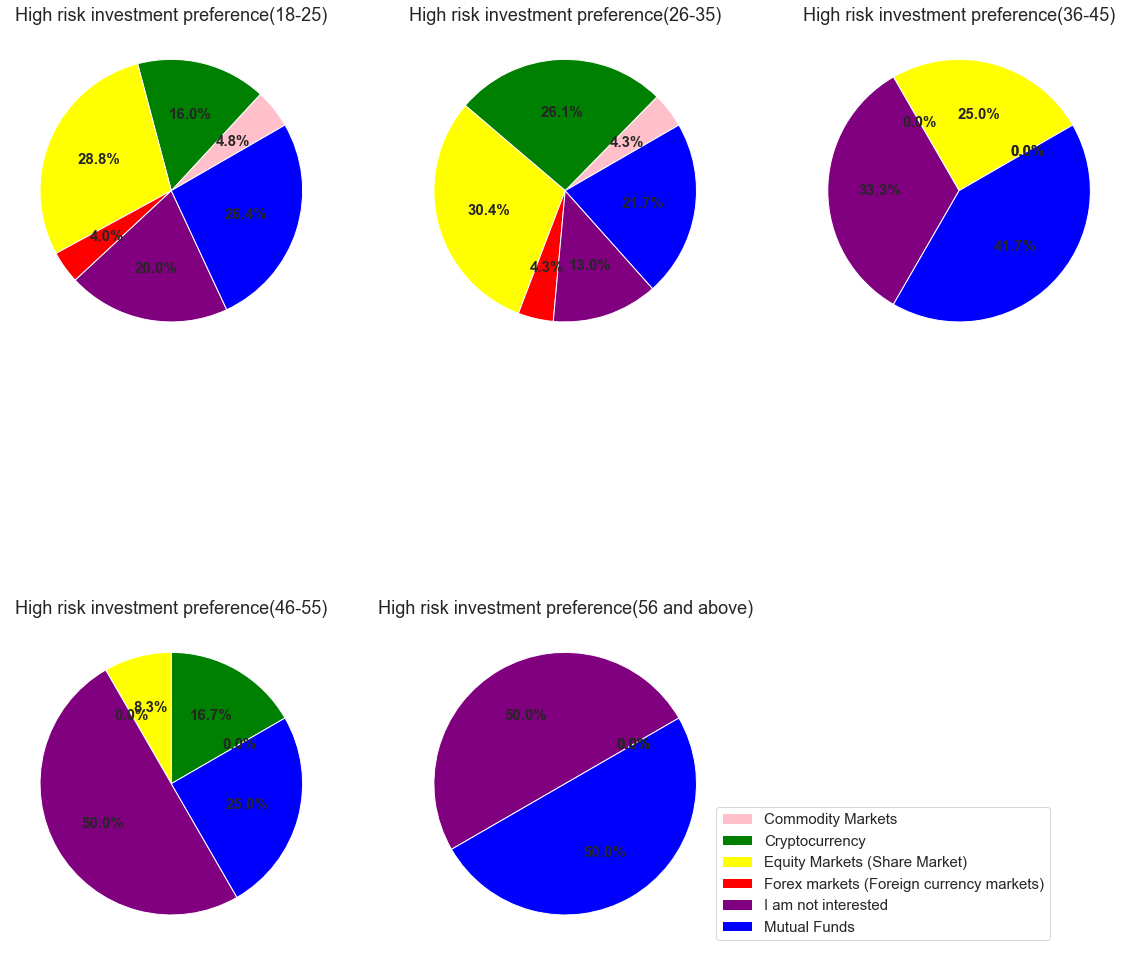

In [12]:
##Plot 8
##High Risk Investment
pie_df_4_18_25 = pd.DataFrame(project_df4_freq.loc['18 - 25'])

pie_df_4_26_35 = pd.DataFrame(project_df4_freq.loc['26 - 35'])

pie_df_4_36_45 = pd.DataFrame(project_df4_freq.loc['36 - 45'])

pie_df_4_46_55 = pd.DataFrame(project_df4_freq.loc['46 - 55'])

pie_df_4_56 = pd.DataFrame(project_df4_freq.loc['56 and above'])

fig, axs = plt.subplots(2, 3, figsize=(20,20))
fig.delaxes(ax=axs[1,2])

axs[0,0].pie(pie_df_4_18_25['18 - 25'], startangle=30, autopct = '%1.1f%%',
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[0,0].set_title("High risk investment preference(18-25)", fontsize=18)
axs[0,1].pie(pie_df_4_26_35['26 - 35'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[0,1].set_title("High risk investment preference(26-35)", fontsize=18)
axs[0,2].pie(pie_df_4_36_45['36 - 45'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[0,2].set_title("High risk investment preference(36-45)", fontsize=18)
axs[1,0].pie(pie_df_4_46_55['46 - 55'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[1,0].set_title("High risk investment preference(46-55)", fontsize=18)
axs[1,1].pie(pie_df_4_56['56 and above'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['pink', 'green', 'yellow', 'red', 'purple', 'blue'])
axs[1,1].set_title("High risk investment preference(56 and above)", fontsize=18)

legend = plt.legend(['Commodity Markets','Cryptocurrency','Equity Markets (Share Market)',
                     'Forex markets (Foreign currency markets)','I am not interested','Mutual Funds'], 
                        bbox_to_anchor=(2, 0), 
                        loc='lower right',  
                        ncol=1, 
                        fontsize = 15,
                        fancybox=True)

In [13]:
##Plot 9 to 13
project_df5 = project_df1['agegroup']
project_df5 = pd.DataFrame(project_df5)
low_percent = project_df1['per_linv']
project_df5['low_percent'] = low_percent
mod_percent = project_df1['per_minv']
project_df5['mod_percent'] = mod_percent
high_percent = project_df1['per_hinv']
project_df5['high_percent'] = high_percent

low_inv_freq = pd.crosstab(project_df5.agegroup, project_df5.low_percent)
mod_inv_freq = pd.crosstab(project_df5.agegroup, project_df5.mod_percent)
high_inv_freq = pd.crosstab(project_df5.agegroup, project_df5.high_percent)



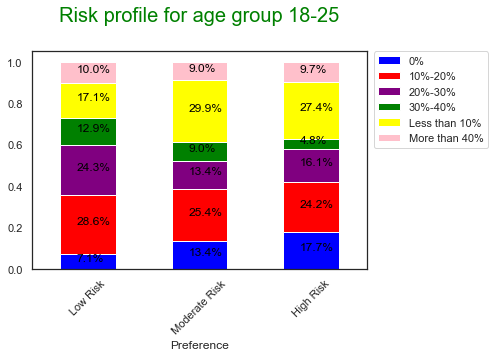

In [14]:
##Plot 9
##Age group 18 - 25
A = pd.DataFrame(low_inv_freq.loc['18 - 25'])
B = pd.DataFrame(mod_inv_freq.loc['18 - 25'])
C = pd.DataFrame(high_inv_freq.loc['18 - 25'])
percent_18_25 = pd.concat([A, B, C], axis = 1)
percent_18_25.columns = ['Low Risk', 'Moderate Risk', 'High Risk']
percent_18_25=percent_18_25.transpose().reset_index().rename(columns = {'index': 'Preference'})

totalG = percent_18_25.sum(axis=1)
for i in ['0%','10%-20%','20%-30%','30%-40%','Less than 10%','More than 40%']:
    percent_18_25[i]=pd.to_numeric(percent_18_25[i])/totalG
percent_18_25.set_index('Preference').plot(kind='bar', stacked=True, 
                                      color = ['blue', 'red', 'purple', 'green', 'yellow', 'pink'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(label="Risk profile for age group 18-25", loc="center", fontsize=20, 
          color="green", pad=30)
plt.xticks(rotation = 45)
for n, x in enumerate([*percent_18_25.set_index('Preference').index.values]):
    
    for (proportion, y_loc) in zip(percent_18_25.set_index('Preference').loc[x],
    percent_18_25.set_index('Preference').loc[x].cumsum()):
        
        plt.text(x=n-0.1 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

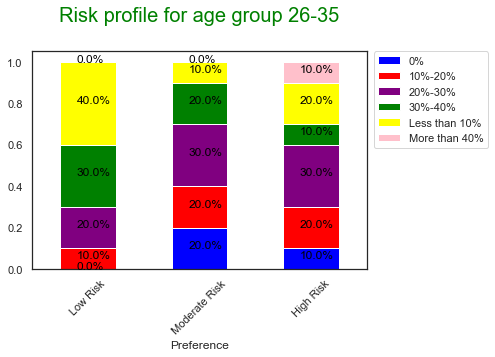

In [15]:
##Plot 10
##Age group 26 - 35
A = pd.DataFrame(low_inv_freq.loc['26 - 35'])
B = pd.DataFrame(mod_inv_freq.loc['26 - 35'])
C = pd.DataFrame(high_inv_freq.loc['26 - 35'])
percent_26_35 = pd.concat([A, B, C], axis = 1)
percent_26_35.columns = ['Low Risk', 'Moderate Risk', 'High Risk']
percent_26_35=percent_26_35.transpose().reset_index().rename(columns = {'index': 'Preference'})

totalH = percent_26_35.sum(axis=1)
for i in ['0%','10%-20%','20%-30%','30%-40%','Less than 10%','More than 40%']:
    percent_26_35[i]=pd.to_numeric(percent_26_35[i])/totalH
percent_26_35.set_index('Preference').plot(kind='bar', stacked=True, 
                                      color = ['blue', 'red', 'purple', 'green', 'yellow', 'pink'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(label="Risk profile for age group 26-35", loc="center", fontsize=20, 
          color="green", pad=30)
plt.xticks(rotation = 45)

for n, x in enumerate([*percent_26_35.set_index('Preference').index.values]):
    
    for (proportion, y_loc) in zip(percent_26_35.set_index('Preference').loc[x],
    percent_26_35.set_index('Preference').loc[x].cumsum()):
        
        plt.text(x=n-0.1 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

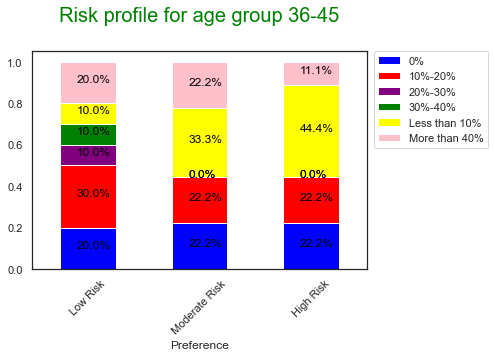

In [16]:
##Plot 11
##Age group 36 - 45
A = pd.DataFrame(low_inv_freq.loc['36 - 45'])
B = pd.DataFrame(mod_inv_freq.loc['36 - 45'])
C = pd.DataFrame(high_inv_freq.loc['36 - 45'])
percent_36_45 = pd.concat([A, B, C], axis = 1)
percent_36_45.columns = ['Low Risk', 'Moderate Risk', 'High Risk']
percent_36_45=percent_36_45.transpose().reset_index().rename(columns = {'index': 'Preference'})

totalI = percent_36_45.sum(axis=1)
for i in ['0%','10%-20%','20%-30%','30%-40%','Less than 10%','More than 40%']:
    percent_36_45[i]=pd.to_numeric(percent_36_45[i])/totalI
percent_36_45.set_index('Preference').plot(kind='bar', stacked=True,
                                      color = ['blue', 'red', 'purple', 'green', 'yellow', 'pink'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(label="Risk profile for age group 36-45", loc="center", fontsize=20, 
          color="green", pad=30)
plt.xticks(rotation = 45)

for n, x in enumerate([*percent_36_45.set_index('Preference').index.values]):
    
    for (proportion, y_loc) in zip(percent_36_45.set_index('Preference').loc[x],
    percent_36_45.set_index('Preference').loc[x].cumsum()):
        
        plt.text(x=n-0.1 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)


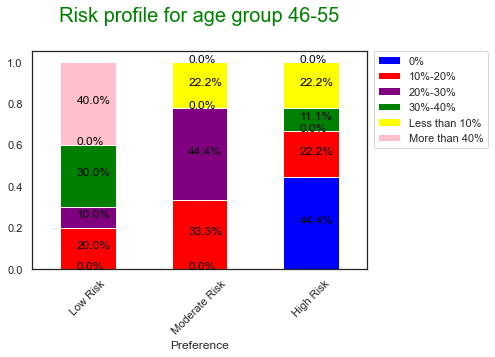

In [17]:
##Plot 12
##Age group 46 - 55
A = pd.DataFrame(low_inv_freq.loc['46 - 55'])
B = pd.DataFrame(mod_inv_freq.loc['46 - 55'])
C = pd.DataFrame(high_inv_freq.loc['46 - 55'])
percent_46_55 = pd.concat([A, B, C], axis = 1)
percent_46_55.columns = ['Low Risk', 'Moderate Risk', 'High Risk']
percent_46_55=percent_46_55.transpose().reset_index().rename(columns = {'index': 'Preference'})

totalJ = percent_46_55.sum(axis=1)
for i in ['0%','10%-20%','20%-30%','30%-40%','Less than 10%','More than 40%']:
    percent_46_55[i]=pd.to_numeric(percent_46_55[i])/totalJ
percent_46_55.set_index('Preference').plot(kind='bar', stacked=True,
                                     color = ['blue', 'red', 'purple', 'green', 'yellow', 'pink'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(label="Risk profile for age group 46-55", loc="center", fontsize=20, 
          color="green", pad=30)
plt.xticks(rotation = 45)

for n, x in enumerate([*percent_46_55.set_index('Preference').index.values]):
    
    for (proportion, y_loc) in zip(percent_46_55.set_index('Preference').loc[x],
    percent_46_55.set_index('Preference').loc[x].cumsum()):
        
        plt.text(x=n-0.1 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)


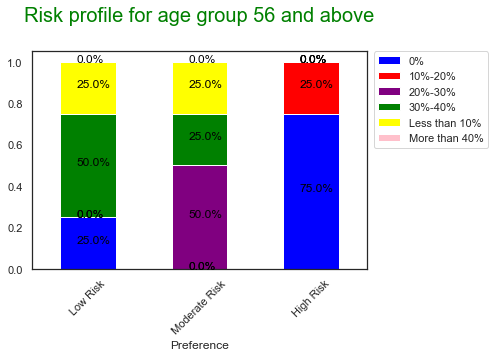

In [18]:
##Plot 13
##Age group 56
A = pd.DataFrame(low_inv_freq.loc['56 and above'])
B = pd.DataFrame(mod_inv_freq.loc['56 and above'])
C = pd.DataFrame(high_inv_freq.loc['56 and above'])
percent_56 = pd.concat([A, B, C], axis = 1)
percent_56.columns = ['Low Risk', 'Moderate Risk', 'High Risk']
percent_56=percent_56.transpose().reset_index().rename(columns = {'index': 'Preference'})

totalK = percent_56.sum(axis=1)
for i in ['0%','10%-20%','20%-30%','30%-40%','Less than 10%','More than 40%']:
    percent_56[i]=pd.to_numeric(percent_56[i])/totalK
percent_56.set_index('Preference').plot(kind='bar', stacked=True,
                                  color = ['blue', 'red', 'purple', 'green', 'yellow', 'pink'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(label="Risk profile for age group 56 and above", loc="center", fontsize=20, 
          color="green", pad=30)
plt.xticks(rotation = 45)

for n, x in enumerate([*percent_56.set_index('Preference').index.values]):
    
    for (proportion, y_loc) in zip(percent_56.set_index('Preference').loc[x],
    percent_56.set_index('Preference').loc[x].cumsum()):
        
        plt.text(x=n-0.1 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)


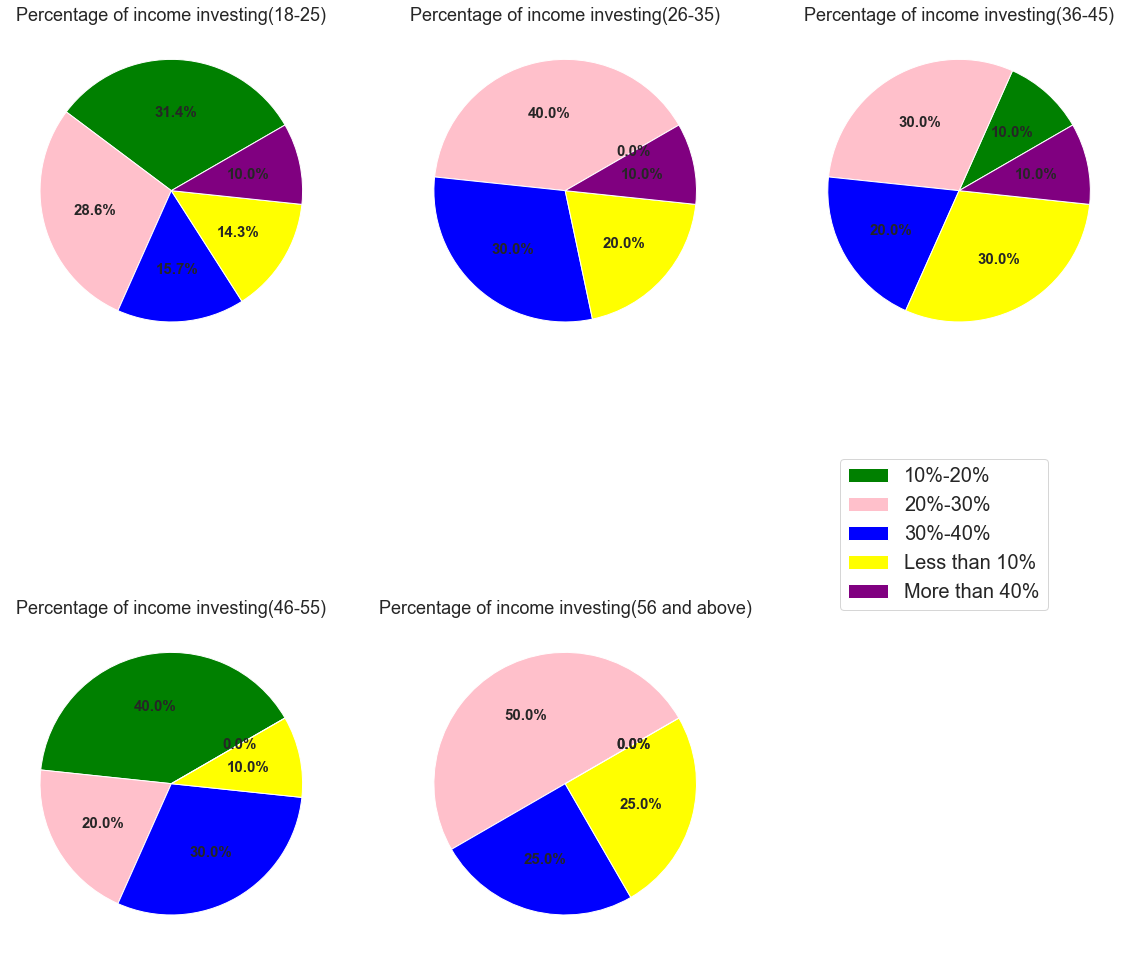

In [19]:
##Plot 14 
project_df6 = project_df1['agegroup']
project_df6 = pd.DataFrame(project_df6)
percent = project_df1['per_inv']
project_df6['percent'] = percent
project_df6_freq = pd.crosstab(project_df6.agegroup, project_df6.percent); project_df6_freq

##Age group 18 - 25 
tpercent_18_25 = pd.DataFrame(project_df6_freq.loc['18 - 25'])

##Age group 26 - 35 
tpercent_26_35 = pd.DataFrame(project_df6_freq.loc['26 - 35'])

##Age group 36 - 45 
tpercent_36_45 = pd.DataFrame(project_df6_freq.loc['36 - 45'])

##Age group 46 - 55 
tpercent_46_55 = pd.DataFrame(project_df6_freq.loc['46 - 55'])

##Age group 56
tpercent_56 = pd.DataFrame(project_df6_freq.loc['56 and above'])

fig, axs = plt.subplots(2, 3, figsize=(20,20))
fig.delaxes(ax=axs[1,2])

axs[0,0].pie(tpercent_18_25['18 - 25'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['green', 'pink', 'blue', 'yellow', 'purple'])
axs[0,0].set_title("Percentage of income investing(18-25)", fontsize=18)
axs[0,1].pie(tpercent_26_35['26 - 35'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['green', 'pink', 'blue', 'yellow', 'purple'])
axs[0,1].set_title("Percentage of income investing(26-35)", fontsize=18)
axs[0,2].pie(tpercent_36_45['36 - 45'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['green', 'pink', 'blue', 'yellow', 'purple'])
axs[0,2].set_title("Percentage of income investing(36-45)", fontsize=18)
axs[1,0].pie(tpercent_46_55['46 - 55'], startangle=30, autopct = '%1.1f%%', 
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['green', 'pink', 'blue', 'yellow', 'purple'])
axs[1,0].set_title("Percentage of income investing(46-55)", fontsize=18)
axs[1,1].pie(tpercent_56['56 and above'], startangle=30, autopct = '%1.1f%%',  
             textprops={'fontweight': 'bold', 'fontsize': 15},
             colors = ['green', 'pink', 'blue', 'yellow', 'purple'])
axs[1,1].set_title("Percentage of income investing(56 and above)", fontsize=18)

legend = plt.legend(['10%-20%','20%-30%','30%-40%','Less than 10%','More than 40%'], 
                        bbox_to_anchor=(2, 1), 
                        loc='lower right',  
                        ncol=1, 
                        fontsize = 20,
                        fancybox=True)

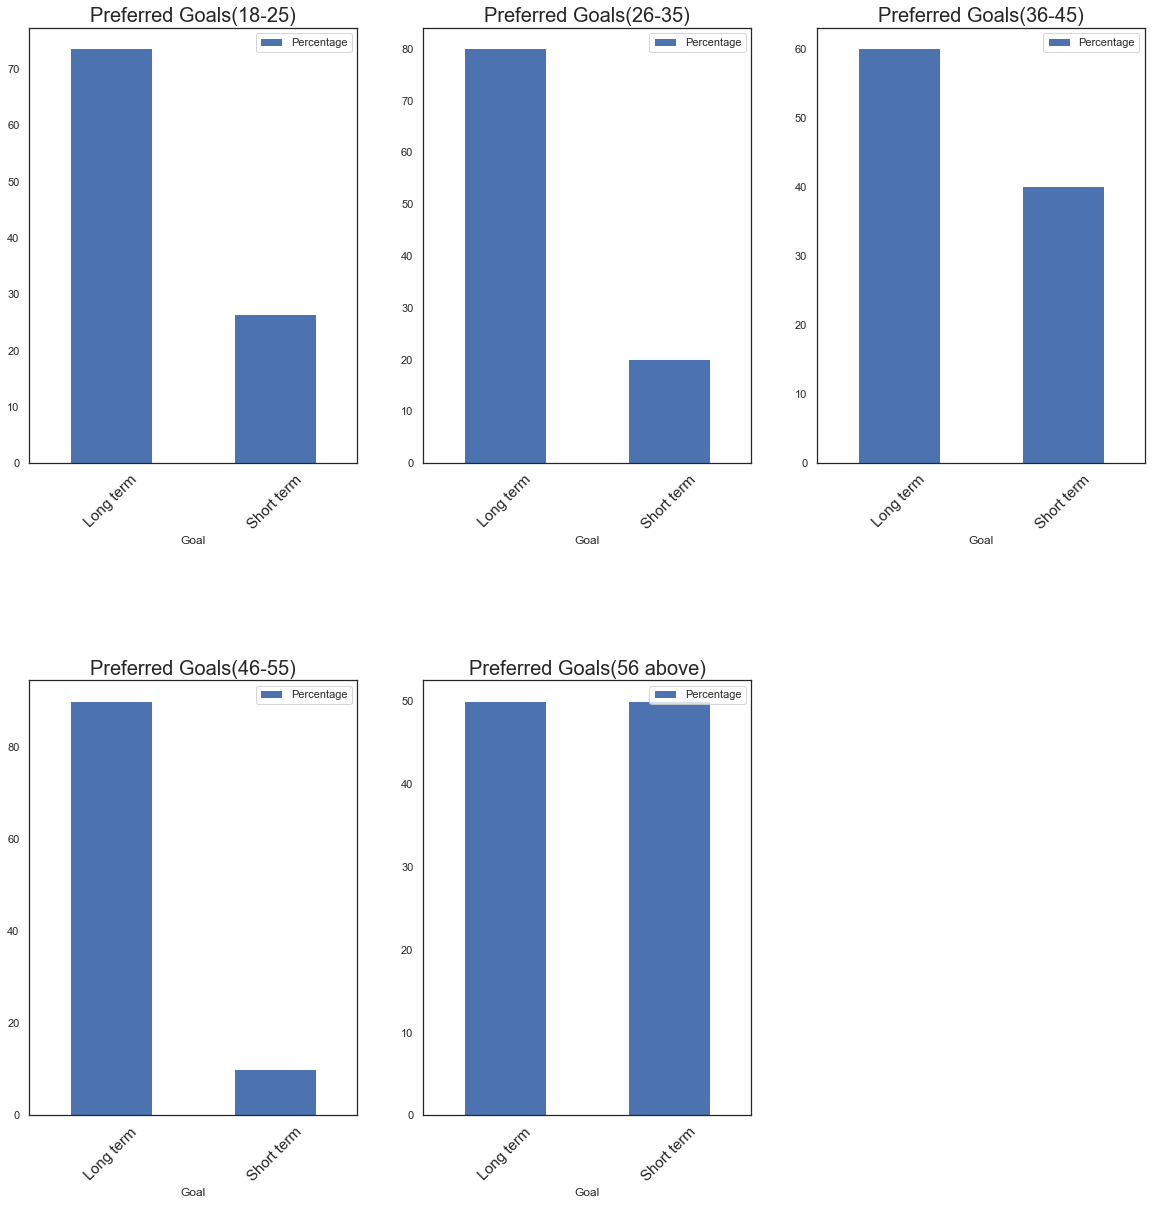

In [20]:
##Plot 15
project_df7 = project_df1['agegroup']
project_df7 = pd.DataFrame(project_df7)
goal = project_df1['goal_pref']
project_df7['Goal'] = goal
project_df7_freq = pd.crosstab(project_df7.agegroup, project_df7.Goal); project_df7_freq

##Age group 18 - 25 
goal_18_25 = pd.DataFrame(project_df7_freq.loc['18 - 25'])
goal_18_25['percentage'] = (goal_18_25['18 - 25']/goal_18_25['18 - 25'].sum())*100
goal_18_25.columns = ['Frequency', 'Percentage']
goal_18_25 = goal_18_25.drop('Frequency',1).reset_index().set_index('Goal')

##Age group 26 - 35 
goal_26_35 = pd.DataFrame(project_df7_freq.loc['26 - 35'])
goal_26_35['percentage'] = (goal_26_35['26 - 35']/goal_26_35['26 - 35'].sum())*100
goal_26_35.columns = ['Frequency', 'Percentage']
goal_26_35 = goal_26_35.drop('Frequency',1).reset_index().set_index('Goal')

##Age group 36 - 45 
goal_36_45 = pd.DataFrame(project_df7_freq.loc['36 - 45'])
goal_36_45['percentage'] = (goal_36_45['36 - 45']/goal_36_45['36 - 45'].sum())*100
goal_36_45.columns = ['Frequency', 'Percentage']
goal_36_45 = goal_36_45.drop('Frequency',1).reset_index().set_index('Goal')
##Age group 46 - 55 
goal_46_55 = pd.DataFrame(project_df7_freq.loc['46 - 55'])
goal_46_55['percentage'] = (goal_46_55['46 - 55']/goal_46_55['46 - 55'].sum())*100
goal_46_55.columns = ['Frequency', 'Percentage']
goal_46_55 = goal_46_55.drop('Frequency',1).reset_index().set_index('Goal')

##Age group 56 
goal_56 = pd.DataFrame(project_df7_freq.loc['56 and above'])
goal_56['percentage'] = (goal_56['56 and above']/goal_56['56 and above'].sum())*100
goal_56.columns = ['Frequency', 'Percentage']
goal_56 = goal_56.drop('Frequency',1).reset_index().set_index('Goal')

fig, axs = plt.subplots(2, 3, figsize=(20,20), squeeze=False)
fig.delaxes(ax=axs[1,2])
goal_18_25.plot(ax=axs[0,0],kind='bar')
goal_26_35.plot(ax=axs[0,1],kind='bar')
goal_36_45.plot(ax=axs[0,2],kind='bar')
goal_46_55.plot(ax=axs[1,0],kind='bar')
goal_56.plot(ax=axs[1,1],kind='bar')
axs[0, 0].set_title("Preferred Goals(18-25)", fontsize=20)
axs[0, 1].set_title("Preferred Goals(26-35)",fontsize=20)
axs[0, 2].set_title("Preferred Goals(36-45)",fontsize=20)
axs[1, 0].set_title("Preferred Goals(46-55)",fontsize=20)
axs[1, 1].set_title("Preferred Goals(56 above)",fontsize=20)
axs[0, 0].set_xticklabels(['Long term', 'Short term'], rotation = 45, fontsize = 15)
axs[0, 1].set_xticklabels(['Long term', 'Short term'], rotation = 45, fontsize = 15)
axs[0, 2].set_xticklabels(['Long term', 'Short term'], rotation = 45, fontsize = 15)
axs[1, 0].set_xticklabels(['Long term', 'Short term'], rotation = 45, fontsize = 15)
axs[1, 1].set_xticklabels(['Long term', 'Short term'], rotation = 45, fontsize = 15) 

plt.subplots_adjust(hspace=0.5)

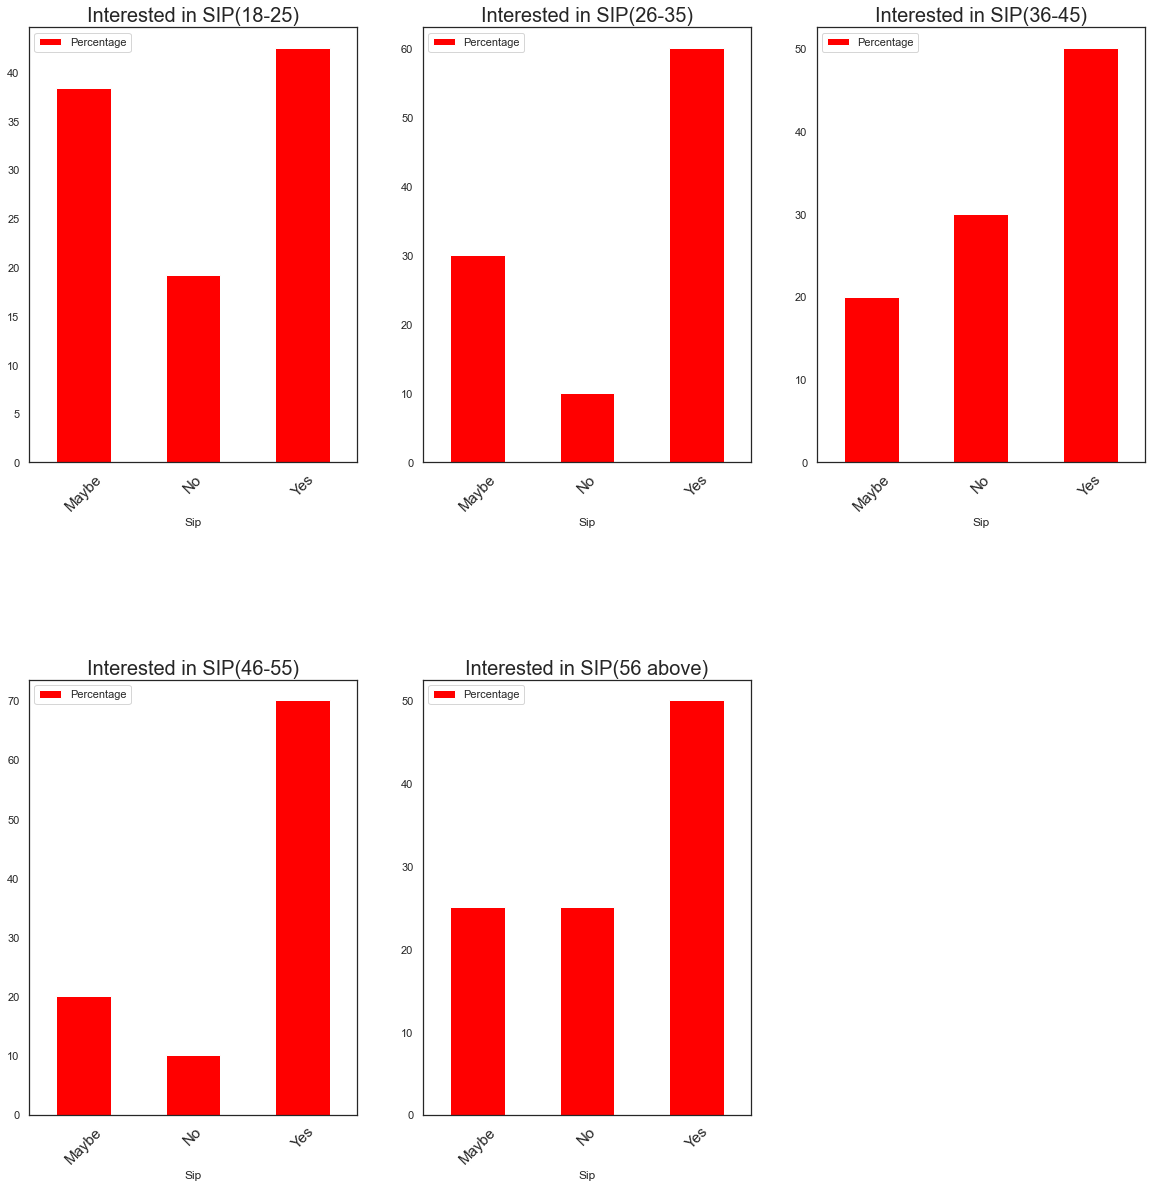

In [21]:
##Plot 16
project_df8 = project_df1['agegroup']
project_df8 = pd.DataFrame(project_df8)
sip = project_df1['sip']
project_df8['Sip'] = sip
project_df8_freq = pd.crosstab(project_df8.agegroup, project_df8.Sip); project_df8_freq

##Age group 18 - 25 
sip_18_25 = pd.DataFrame(project_df8_freq.loc['18 - 25'])
sip_18_25['percentage'] = (sip_18_25['18 - 25']/sip_18_25['18 - 25'].sum())*100
sip_18_25.columns = ['Frequency', 'Percentage']
sip_18_25 = sip_18_25.drop('Frequency',1).reset_index().set_index('Sip')

##Age group 26 - 35 
sip_26_35 = pd.DataFrame(project_df8_freq.loc['26 - 35'])
sip_26_35['percentage'] = (sip_26_35['26 - 35']/sip_26_35['26 - 35'].sum())*100
sip_26_35.columns = ['Frequency', 'Percentage']
sip_26_35 = sip_26_35.drop('Frequency',1).reset_index().set_index('Sip')


##Age group 36 - 45 
sip_36_45 = pd.DataFrame(project_df8_freq.loc['36 - 45'])
sip_36_45['percentage'] = (sip_36_45['36 - 45']/sip_36_45['36 - 45'].sum())*100
sip_36_45.columns = ['Frequency', 'Percentage']
sip_36_45 = sip_36_45.drop('Frequency',1).reset_index().set_index('Sip')

##Age group 46 - 55 
sip_46_55 = pd.DataFrame(project_df8_freq.loc['46 - 55'])
sip_46_55['percentage'] = (sip_46_55['46 - 55']/sip_46_55['46 - 55'].sum())*100
sip_46_55.columns = ['Frequency', 'Percentage']
sip_46_55 = sip_46_55.drop('Frequency',1).reset_index().set_index('Sip')

##Age group 56 
sip_56 = pd.DataFrame(project_df8_freq.loc['56 and above'])
sip_56['percentage'] = (sip_56['56 and above']/sip_56['56 and above'].sum())*100
sip_56.columns = ['Frequency', 'Percentage']
sip_56 = sip_56.drop('Frequency',1).reset_index().set_index('Sip')


fig, axs = plt.subplots(2, 3, figsize=(20,20), squeeze=False)
fig.delaxes(ax=axs[1,2])
sip_18_25.plot(ax=axs[0,0],kind='bar', color = 'red')
sip_26_35.plot(ax=axs[0,1],kind='bar', color = 'red')
sip_36_45.plot(ax=axs[0,2],kind='bar', color = 'red')
sip_46_55.plot(ax=axs[1,0],kind='bar', color = 'red')
sip_56.plot(ax=axs[1,1],kind='bar', color = 'red')
axs[0, 0].set_title("Interested in SIP(18-25)", fontsize=20)
axs[0, 1].set_title("Interested in SIP(26-35)",fontsize=20)
axs[0, 2].set_title("Interested in SIP(36-45)",fontsize=20)
axs[1, 0].set_title("Interested in SIP(46-55)",fontsize=20)
axs[1, 1].set_title("Interested in SIP(56 above)",fontsize=20)
axs[0, 0].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[0, 1].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[0, 2].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[1, 0].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[1, 1].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15) 

plt.subplots_adjust(hspace=0.5)

(array([0, 1, 2]), [Text(0, 0, 'Maybe'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

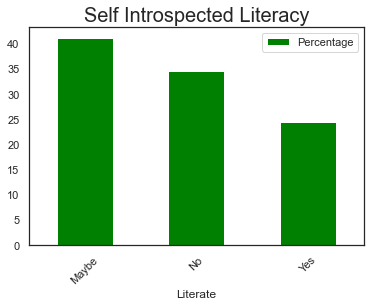

In [22]:
##Plot 17
project_df9 = pd.DataFrame(project_df1['fin_lite'].value_counts())
project_df9['percentage'] = project_df9['fin_lite']/project_df9['fin_lite'].sum()*100
project_df9 = project_df9.reset_index()
project_df9.columns = ['Literate', 'Frequency', 'Percentage']

project_df9 = project_df9.drop('Frequency',1).set_index('Literate')
project_df9.plot(kind='bar', color = 'green')
plt.title("Self Introspected Literacy", fontsize=20)
plt.xticks(rotation = 45)


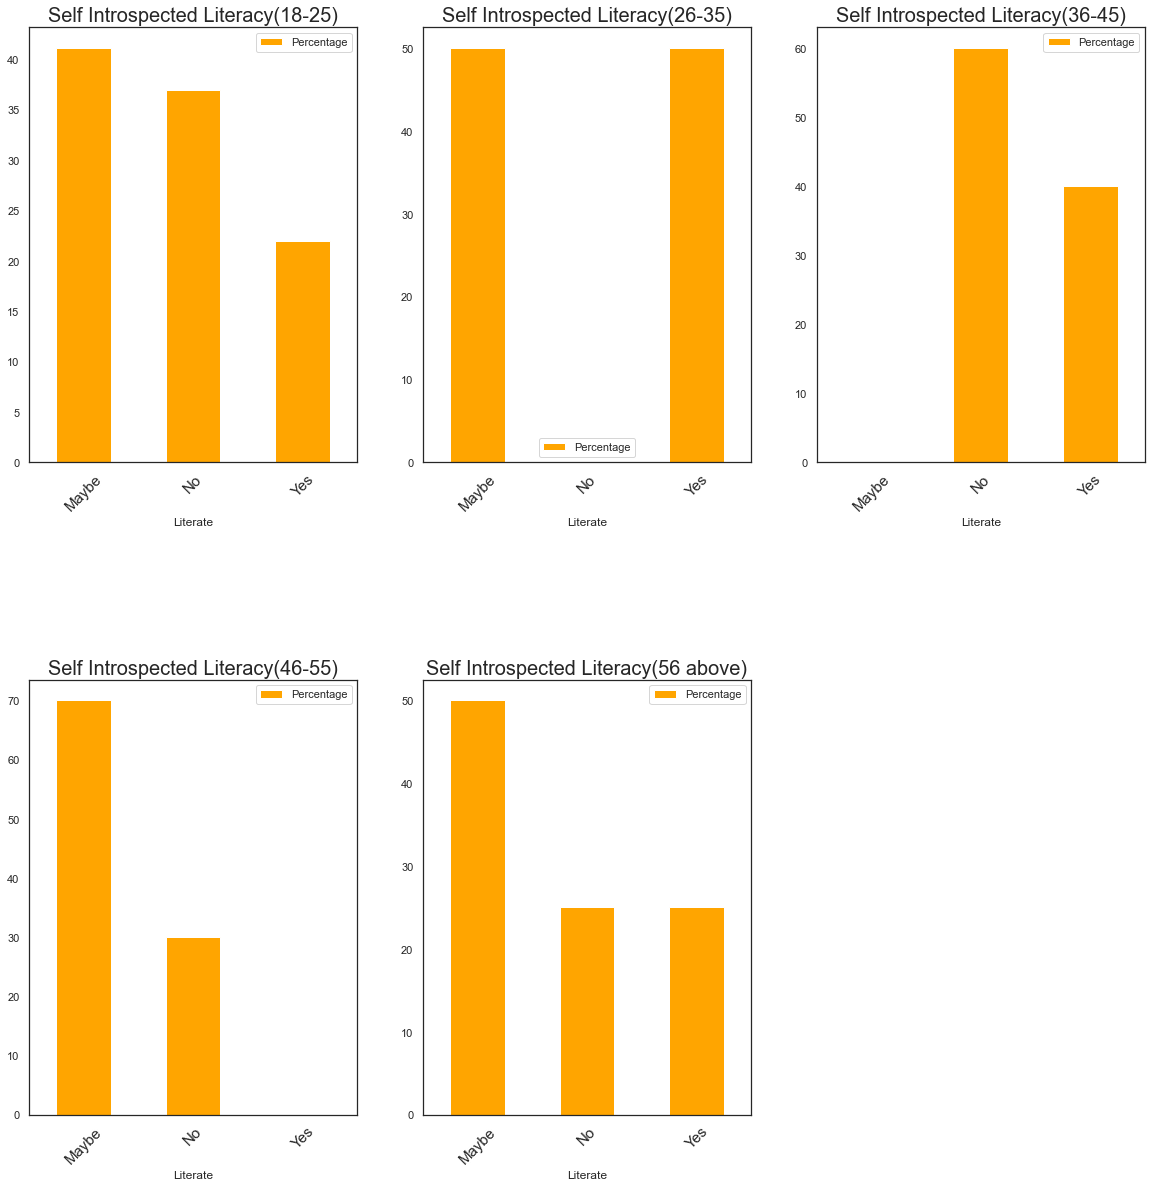

In [23]:
## Plot 18
project_df10 = project_df1['agegroup']
project_df10 = pd.DataFrame(project_df10)
lite = project_df1['fin_lite']
project_df10['Literate'] = lite
project_df10_freq = pd.crosstab(project_df10.agegroup, project_df10.Literate)

##Age group 18 - 25 
lite_18_25 = pd.DataFrame(project_df10_freq.loc['18 - 25'])
lite_18_25['percentage'] = (lite_18_25['18 - 25']/lite_18_25['18 - 25'].sum())*100
lite_18_25.columns = ['Frequency', 'Percentage']
lite_18_25 = lite_18_25.drop('Frequency',1).reset_index().set_index('Literate')

##Age group 26 - 35 
lite_26_35 = pd.DataFrame(project_df10_freq.loc['26 - 35'])
lite_26_35['percentage'] = (lite_26_35['26 - 35']/lite_26_35['26 - 35'].sum())*100
lite_26_35.columns = ['Frequency', 'Percentage']
lite_26_35 = lite_26_35.drop('Frequency',1).reset_index().set_index('Literate')

##Age group 36 - 45 
lite_36_45 = pd.DataFrame(project_df10_freq.loc['36 - 45'])
lite_36_45['percentage'] = (lite_36_45['36 - 45']/lite_36_45['36 - 45'].sum())*100
lite_36_45.columns = ['Frequency', 'Percentage']
lite_36_45 = lite_36_45.drop('Frequency',1).reset_index().set_index('Literate')

##Age group 46 - 55 
lite_46_55 = pd.DataFrame(project_df10_freq.loc['46 - 55'])
lite_46_55['percentage'] = (lite_46_55['46 - 55']/lite_46_55['46 - 55'].sum())*100
lite_46_55.columns = ['Frequency', 'Percentage']
lite_46_55 = lite_46_55.drop('Frequency',1).reset_index().set_index('Literate')

##Age group 56 
lite_56 = pd.DataFrame(project_df10_freq.loc['56 and above'])
lite_56['percentage'] = (lite_56['56 and above']/lite_56['56 and above'].sum())*100
lite_56.columns = ['Frequency', 'Percentage']
lite_56 = lite_56.drop('Frequency',1).reset_index().set_index('Literate')
fig, axs = plt.subplots(2, 3, figsize=(20,20), squeeze=False)
fig.delaxes(ax=axs[1,2])
lite_18_25.plot(ax=axs[0,0], kind='bar', color = 'orange')
lite_26_35.plot(ax=axs[0,1], kind='bar', color = 'orange')
lite_36_45.plot(ax=axs[0,2], kind='bar',  color = 'orange')
lite_46_55.plot(ax=axs[1,0], kind='bar', color = 'orange')
lite_56.plot(ax=axs[1,1], kind='bar', color = 'orange')
axs[0, 0].set_title("Self Introspected Literacy(18-25)", fontsize=20)
axs[0, 1].set_title("Self Introspected Literacy(26-35)",fontsize=20)
axs[0, 2].set_title("Self Introspected Literacy(36-45)",fontsize=20)
axs[1, 0].set_title("Self Introspected Literacy(46-55)",fontsize=20)
axs[1, 1].set_title("Self Introspected Literacy(56 above)",fontsize=20)
axs[0, 0].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[0, 1].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[0, 2].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[1, 0].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15)
axs[1, 1].set_xticklabels(['Maybe', 'No', 'Yes'], rotation = 45, fontsize = 15) 

plt.subplots_adjust(hspace=0.5)

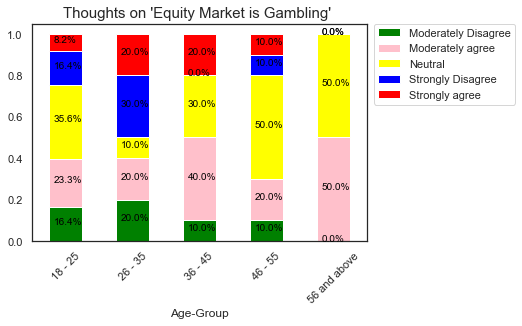

In [24]:
##Plot 19 
project_df11 = pd.crosstab(project_df1.agegroup, project_df1.gamb)
project_df11=project_df11.reset_index()
project_df11 = project_df11.rename(columns = {'agegroup' : 'Age-Group'})
totalL = project_df11.sum(axis=1);totalL
for i in ['Moderately Disagree','Moderately agree','Neutral','Strongly Disagree','Strongly agree']:
    project_df11[i]=project_df11[i]/totalL
project_df11 = project_df11.set_index('Age-Group')

sns.set(style='white')
project_df11.plot(kind='bar', stacked=True, color = ['green', 'pink', 'yellow', 'blue', 'red'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Thoughts on 'Equity Market is Gambling' ", fontsize = 15)
plt.xticks(rotation = 45)

for n, x in enumerate([*project_df11.index.values]):
    
    for (proportion, y_loc) in zip(project_df11.loc[x],
    project_df11.loc[x].cumsum()):
        
        plt.text(x=n-0.18 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10)